In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline


In [2]:
data = pd.read_csv("airline_passengers.csv")
print(data.shape)

(145, 2)


In [3]:
data.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
data.isna().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [5]:
data[data['Thousands of Passengers'].isna()]

,Month,Thousands of Passengers
144,International airline passengers: monthly tota...,NaN


In [6]:
data.dropna(axis=0,inplace=True)

In [7]:
data.isna().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [8]:
data['Month']=pd.to_datetime(data['Month'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [9]:
data.set_index('Month',inplace=True)
data.head(2)

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0


<Axes: xlabel='Month'>

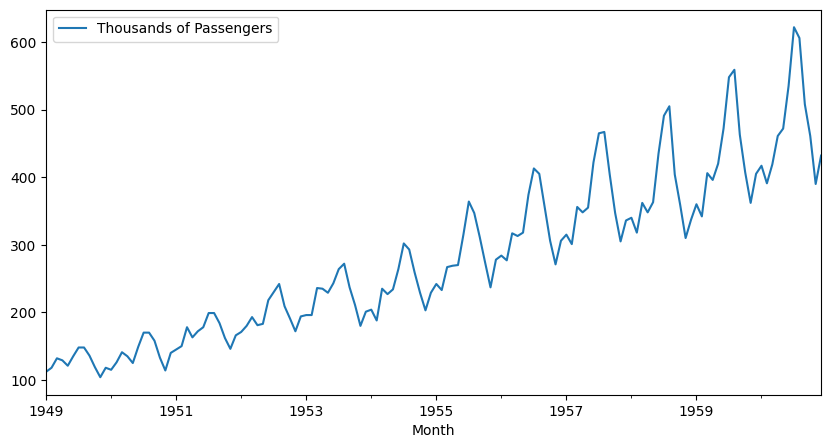

In [10]:
data.plot(figsize=(10,5))

# Stationarity Test

### Dickey Fuller Test

In [11]:
from statsmodels.tsa.stattools import adfuller

In [19]:
def adf_test(feature):
    result = adfuller(feature)
    print(f"ADF Statistics: {result[0]}")
    print (f"p-value: {result[1]}")
    if result[0] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no root and is stationary")
    else:
        print("Weak evidence against the null hypothesis, time series has a root, indicating it is non-stationary")

In [16]:
adf_test(data['Thousands of Passengers'])

ADF Statistics: 0.8153688792060482
p- value: 0.991880243437641
Weak evidence against the null hypothesis, time series has a root, indicating it is non-stationary


### Making data Stationary

In [17]:
# Using Differencing by 1 position
data['Passengers first difference'] = data['Thousands of Passengers'] - data['Thousands of Passengers'].shift(1)
data.head()

,Thousands of Passengers,Passengers first difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [22]:
adf_test(data['Passengers first difference'].dropna())

ADF Statistics: -2.8292668241699994
p-value: 0.0542132902838255
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no root and is stationary


In [23]:
## Second differencing
data['Passengers second difference'] = data['Passengers first difference'] - data['Passengers first difference'].shift(1)
data.head()

,Thousands of Passengers,Passengers first difference,Passengers second difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [25]:
adf_test(data['Passengers second difference'].dropna())

ADF Statistics: -16.384231542468505
p-value: 2.7328918500142407e-29
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no root and is stationary


In [26]:
# 12 month difference
data['Passengers 12 difference'] = data['Thousands of Passengers']-data['Thousands of Passengers'].shift(12)
data.head()

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


In [28]:
adf_test(data['Passengers 12 difference'].dropna())

ADF Statistics: -3.383020726492481
p-value: 0.011551493085514954
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no root and is stationary


In [30]:
# importing plot for AR and MA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

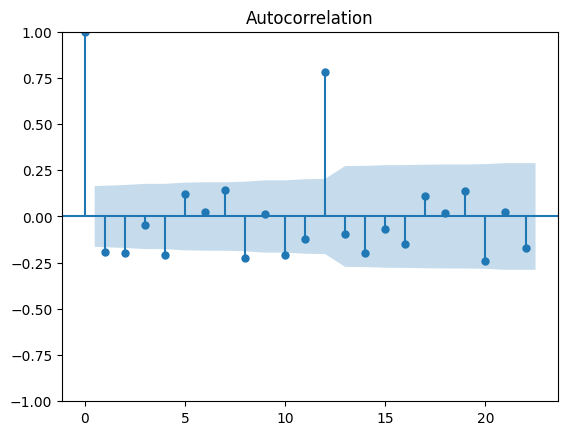

In [35]:
acf = plot_acf(data['Passengers second difference'].dropna())
# use pearson correlation
# q = 12

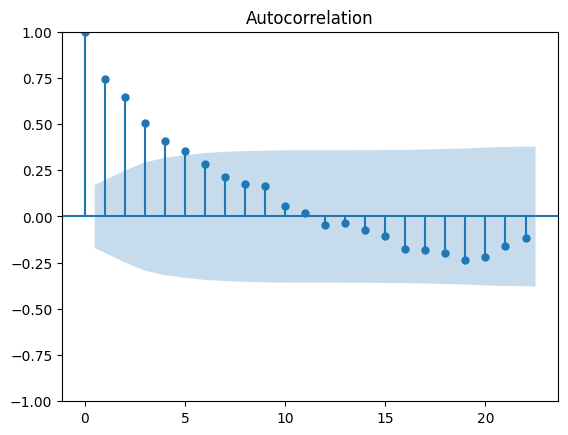

In [36]:
acf12 = plot_acf(data['Passengers 12 difference'].dropna())
# q = 5

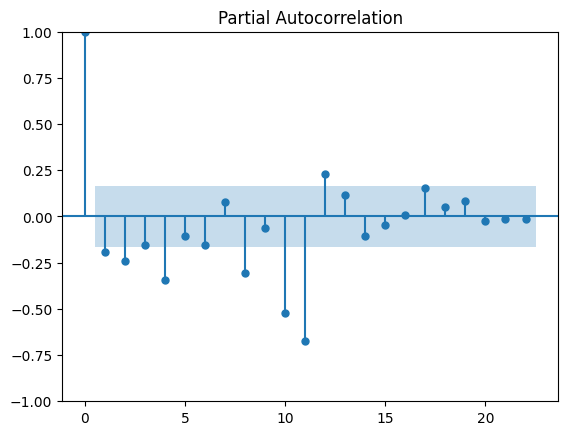

In [37]:
pacf = plot_pacf(data['Passengers second difference'].dropna())

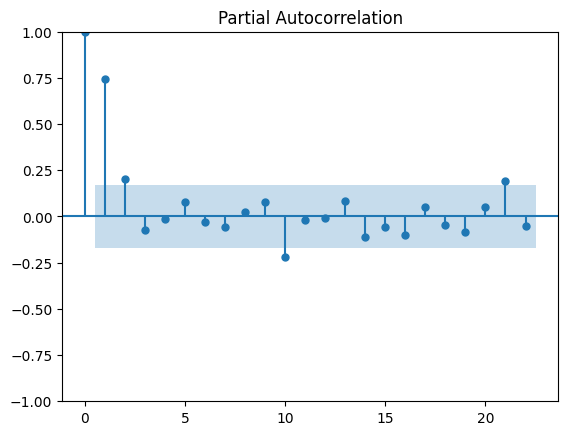

In [38]:
pacf12 = plot_pacf(data['Passengers 12 difference'].dropna())
# p=2, p=10